# HW 0 - Intro to Pandas (Optional)
Credit: https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html


In [3]:
import numpy as np
import pandas as pd
import matplotlib as plt

## Object Creation


Creating a Series by passing a list of values, letting pandas create a default integer index:

In [4]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a DataFrame by passing a NumPy array, with a datetime index and labeled columns:

In [5]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [22]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,-0.242074,-0.121968,0.134520,0.033261
2013-01-02,2.399251,0.810290,-1.551264,-0.453656
2013-01-03,-0.085589,-0.404142,-0.240966,0.719194
2013-01-04,0.915251,0.098419,2.049269,-0.487059
2013-01-05,-0.235443,0.465531,0.156432,-0.060794
2013-01-06,-1.769706,-1.901583,1.228113,-0.807251


Creating a DataFrame by passing a dict of objects that can be converted to series-like.

In [7]:
df2 = pd.DataFrame({'A': 1.,
                     'B': pd.Timestamp('20130102'),
                     'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                     'D': np.array([3] * 4, dtype='int32'),
                     'E': pd.Categorical(["test", "train", "test", "train"]),
                     'F': 'foo'})
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


The columns of the resulting DataFrame have different dtypes.

In [8]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

## Viewing Data

View the top and bottom rows of the frame:

In [27]:
df.head(1)

,A,B,C,D
2013-01-01,-0.242074,-0.121968,0.13452,0.033261


In [24]:
df.tail(3)

,A,B,C,D
2013-01-04,0.915251,0.098419,2.049269,-0.487059
2013-01-05,-0.235443,0.465531,0.156432,-0.060794
2013-01-06,-1.769706,-1.901583,1.228113,-0.807251


Display the index, columns:

In [28]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [29]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

DataFrame.to_numpy() gives a NumPy representation of the underlying data. Note that this can be an expensive operation when your DataFrame has columns with different data types, which comes down to a fundamental difference between pandas and NumPy: NumPy arrays have one dtype for the entire array, while pandas DataFrames have one dtype per column. When you call DataFrame.to_numpy(), pandas will find the NumPy dtype that can hold all of the dtypes in the DataFrame. This may end up being object, which requires casting every value to a Python object.

For df, our DataFrame of all floating-point values, DataFrame.to_numpy() is fast and doesn’t require copying data.

In [13]:
df.values

array([[-0.39534675,  0.03795303, -0.79239488, -0.73822642],
       [-0.63850935, -0.61004941, -1.71891968, -0.48086296],
       [-0.79606599,  1.15735334, -0.42865824, -0.27925352],
       [-0.25704298,  1.13720421, -0.20273099,  0.43708075],
       [-1.37889712, -0.91447862,  0.00575458,  0.97217455],
       [-0.26711176,  0.0904571 ,  0.81558292,  0.13702223]])

In [14]:
df2.values

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

.describe( ) shows a quick statistic summary of your data:

In [30]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.163615,-0.175576,0.296017,-0.176051
std,1.391883,0.947865,1.240085,0.534932
min,-1.769706,-1.901583,-1.551264,-0.807251
25%,-0.240417,-0.333599,-0.147094,-0.478708
50%,-0.160516,-0.011774,0.145476,-0.257225
75%,0.665041,0.373753,0.960193,0.009747
max,2.399251,0.810290,2.049269,0.719194


Transposing your data:

In [31]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-0.242074,2.399251,-0.085589,0.915251,-0.235443,-1.769706
B,-0.121968,0.810290,-0.404142,0.098419,0.465531,-1.901583
C,0.134520,-1.551264,-0.240966,2.049269,0.156432,1.228113
D,0.033261,-0.453656,0.719194,-0.487059,-0.060794,-0.807251


Sorting by an axis:

In [32]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,0.033261,0.134520,-0.121968,-0.242074
2013-01-02,-0.453656,-1.551264,0.810290,2.399251
2013-01-03,0.719194,-0.240966,-0.404142,-0.085589
2013-01-04,-0.487059,2.049269,0.098419,0.915251
2013-01-05,-0.060794,0.156432,0.465531,-0.235443
2013-01-06,-0.807251,1.228113,-1.901583,-1.769706


Sorting by values:

In [33]:
df.sort_values(by='B')

,A,B,C,D
2013-01-06,-1.769706,-1.901583,1.228113,-0.807251
2013-01-03,-0.085589,-0.404142,-0.240966,0.719194
2013-01-01,-0.242074,-0.121968,0.134520,0.033261
2013-01-04,0.915251,0.098419,2.049269,-0.487059
2013-01-05,-0.235443,0.465531,0.156432,-0.060794
2013-01-02,2.399251,0.810290,-1.551264,-0.453656


## Selection

### Getting 

Selecting a single column, which yields a Series, equivalent to df.A:

In [34]:
df['A']

2013-01-01   -0.242074
2013-01-02    2.399251
2013-01-03   -0.085589
2013-01-04    0.915251
2013-01-05   -0.235443
2013-01-06   -1.769706
Freq: D, Name: A, dtype: float64

Selecting via [ ], which slices the rows.

In [35]:
df[0:3]

,A,B,C,D
2013-01-01,-0.242074,-0.121968,0.134520,0.033261
2013-01-02,2.399251,0.810290,-1.551264,-0.453656
2013-01-03,-0.085589,-0.404142,-0.240966,0.719194


In [36]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,2.399251,0.810290,-1.551264,-0.453656
2013-01-03,-0.085589,-0.404142,-0.240966,0.719194
2013-01-04,0.915251,0.098419,2.049269,-0.487059


### Selection by label

For getting a cross section using a label:

In [37]:
df.loc[dates[0]]

A   -0.242074
B   -0.121968
C    0.134520
D    0.033261
Name: 2013-01-01 00:00:00, dtype: float64

Selecting on a multi-axis by label:

In [38]:
df.loc[:, ['A', 'B']]

,A,B
2013-01-01,-0.242074,-0.121968
2013-01-02,2.399251,0.810290
2013-01-03,-0.085589,-0.404142
2013-01-04,0.915251,0.098419
2013-01-05,-0.235443,0.465531
2013-01-06,-1.769706,-1.901583


Showing label slicing, both endpoints are included:

In [39]:
df.loc['20130102':'20130104', ['A', 'B']]

,A,B
2013-01-02,2.399251,0.810290
2013-01-03,-0.085589,-0.404142
2013-01-04,0.915251,0.098419


Reduction in the dimensions of the returned object:

In [40]:
df.loc['20130102', ['A', 'B']]

A    2.399251
B    0.810290
Name: 2013-01-02 00:00:00, dtype: float64

For getting a scalar value:

In [41]:
df.loc[dates[0], 'A']

-0.24207444185504637

For getting fast access to a scalar (equivalent to the prior method):

In [42]:
df.at[dates[0], 'A']

-0.24207444185504637

### Selection by position

Select via the position of the passed integers:

In [43]:
df.iloc[3]

A    0.915251
B    0.098419
C    2.049269
D   -0.487059
Name: 2013-01-04 00:00:00, dtype: float64

By integer slices, acting similar to numpy/python:

In [44]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,0.915251,0.098419
2013-01-05,-0.235443,0.465531


By lists of integer position locations, similar to the numpy/python style:

In [45]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,2.399251,-1.551264
2013-01-03,-0.085589,-0.240966
2013-01-05,-0.235443,0.156432


For slicing rows explicitly:

In [46]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,2.399251,0.810290,-1.551264,-0.453656
2013-01-03,-0.085589,-0.404142,-0.240966,0.719194


For slicing columns explicitly:

In [47]:
df.iloc[:, 1:3]

,B,C
2013-01-01,-0.121968,0.134520
2013-01-02,0.810290,-1.551264
2013-01-03,-0.404142,-0.240966
2013-01-04,0.098419,2.049269
2013-01-05,0.465531,0.156432
2013-01-06,-1.901583,1.228113


For getting a value explicitly:

In [48]:
df.iloc[1, 1]

0.8102899088218004

For getting fast access to a scalar (equivalent to the prior method):

In [49]:
df.iat[1, 1]

0.8102899088218004

### Boolean Indexing

Selecting values from a DataFrame where a boolean condition is met.

In [50]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,NaN,0.134520,0.033261
2013-01-02,2.399251,0.810290,NaN,NaN
2013-01-03,NaN,NaN,NaN,0.719194
2013-01-04,0.915251,0.098419,2.049269,NaN
2013-01-05,NaN,0.465531,0.156432,NaN
2013-01-06,NaN,NaN,1.228113,NaN


Using the isin() method for filtering:

In [51]:
df2 = df.copy()
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2

,A,B,C,D,E
2013-01-01,-0.242074,-0.121968,0.134520,0.033261,one
2013-01-02,2.399251,0.810290,-1.551264,-0.453656,one
2013-01-03,-0.085589,-0.404142,-0.240966,0.719194,two
2013-01-04,0.915251,0.098419,2.049269,-0.487059,three
2013-01-05,-0.235443,0.465531,0.156432,-0.060794,four
2013-01-06,-1.769706,-1.901583,1.228113,-0.807251,three


In [52]:
df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2013-01-03,-0.085589,-0.404142,-0.240966,0.719194,two
2013-01-05,-0.235443,0.465531,0.156432,-0.060794,four


### Setting

Setting a new column automatically aligns the data by the indexes.

In [53]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range('20130102', periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [54]:
df['F'] = s1

Setting values by label:

In [55]:
df.at[dates[0], 'A'] = 0

Setting values by position:

In [56]:
df.iat[0, 1] = 0

Setting by assigning with a NumPy array:

In [57]:
df.loc[:, 'D'] = np.array([5] * len(df))

The result of the prior setting operations.

In [58]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.134520,5,NaN
2013-01-02,2.399251,0.810290,-1.551264,5,1.0
2013-01-03,-0.085589,-0.404142,-0.240966,5,2.0
2013-01-04,0.915251,0.098419,2.049269,5,3.0
2013-01-05,-0.235443,0.465531,0.156432,5,4.0
2013-01-06,-1.769706,-1.901583,1.228113,5,5.0


A where operation with setting.

In [59]:
df2 = df.copy()

df2[df2 > 0] = -df2

df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.134520,-5,NaN
2013-01-02,-2.399251,-0.810290,-1.551264,-5,-1.0
2013-01-03,-0.085589,-0.404142,-0.240966,-5,-2.0
2013-01-04,-0.915251,-0.098419,-2.049269,-5,-3.0
2013-01-05,-0.235443,-0.465531,-0.156432,-5,-4.0
2013-01-06,-1.769706,-1.901583,-1.228113,-5,-5.0


### Missing Data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations. See the Missing Data section.

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

In [60]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])

df1.loc[dates[0]:dates[1], 'E'] = 1

df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.134520,5,NaN,1.0
2013-01-02,2.399251,0.810290,-1.551264,5,1.0,1.0
2013-01-03,-0.085589,-0.404142,-0.240966,5,2.0,NaN
2013-01-04,0.915251,0.098419,2.049269,5,3.0,NaN


** To drop any rows that have missing data. **

In [61]:
df1.dropna()

,A,B,C,D,F,E
2013-01-02,2.399251,0.81029,-1.551264,5,1.0,1.0


Filling missing data.

In [62]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.134520,5,5.0,1.0
2013-01-02,2.399251,0.810290,-1.551264,5,1.0,1.0
2013-01-03,-0.085589,-0.404142,-0.240966,5,2.0,5.0
2013-01-04,0.915251,0.098419,2.049269,5,3.0,5.0


To get the boolean mask where values are nan

In [63]:
df1.isnull()

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## Operations

### Stats

Performing a descriptive statistic:

In [71]:
df.mean()

A    0.203961
B   -0.155247
C    0.296017
D    5.000000
F    3.000000
dtype: float64

Same operation on the other axis:

In [70]:
df.mean(1)

2013-01-01    1.283630
2013-01-02    1.531655
2013-01-03    1.253861
2013-01-04    2.212588
2013-01-05    1.877304
2013-01-06    1.511365
Freq: D, dtype: float64

Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcasts along the specified dimension.

In [66]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [67]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-1.085589,-1.404142,-1.240966,4.0,1.0
2013-01-04,-2.084749,-2.901581,-0.950731,2.0,0.0
2013-01-05,-5.235443,-4.534469,-4.843568,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


### Apply 

Applying functions to the data:

In [68]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.134520,5,NaN
2013-01-02,2.399251,0.810290,-1.416744,10,1.0
2013-01-03,2.313662,0.406148,-1.657710,15,3.0
2013-01-04,3.228913,0.504567,0.391559,20,6.0
2013-01-05,2.993470,0.970098,0.547991,25,10.0
2013-01-06,1.223764,-0.931485,1.776103,30,15.0


In [69]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.134520,5,NaN
2013-01-02,2.399251,0.810290,-1.551264,5,1.0
2013-01-03,-0.085589,-0.404142,-0.240966,5,2.0
2013-01-04,0.915251,0.098419,2.049269,5,3.0
2013-01-05,-0.235443,0.465531,0.156432,5,4.0
2013-01-06,-1.769706,-1.901583,1.228113,5,5.0


### Histrogramming

In [72]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    3
1    4
2    2
3    2
4    5
5    3
6    4
7    6
8    5
9    6
dtype: int64

In [73]:
s.value_counts()

6    2
5    2
4    2
3    2
2    2
dtype: int64

### String Method

Series is equipped with a set of string processing methods in the str attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in str generally uses regular expressions by default (and in some cases always uses them).

In [74]:
s = pd.Series(['A', 'B', 'C', 'AaBa', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s

0       A
1       B
2       C
3    AaBa
4    Baca
5     NaN
6    CABA
7     dog
8     cat
dtype: object

In [75]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Merge

### Concat

pandas provides various facilities for easily combining together Series and DataFrame objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

Concatenating pandas objects together with concat():

In [76]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,-0.243462,0.088871,0.506226,0.898735
1,0.007600,-0.886376,0.850164,0.216278
2,0.158364,-1.106621,0.219936,0.648499
3,0.682413,0.622255,-0.319492,-0.125871
4,-0.844365,-1.270617,1.618494,-0.069179
5,-1.039932,0.354124,0.555866,1.413251
6,-0.734778,1.081660,-0.135187,0.126125
7,0.850950,0.146577,0.759658,-0.749062
8,-0.118676,0.648649,-1.302837,0.597233
9,1.708277,0.093220,0.127386,1.823291


In [77]:
# Break it into pieces
pieces = [df[0:3], df[7:]]
pd.concat(pieces)

,0,1,2,3
0,-0.243462,0.088871,0.506226,0.898735
1,0.007600,-0.886376,0.850164,0.216278
2,0.158364,-1.106621,0.219936,0.648499
7,0.850950,0.146577,0.759658,-0.749062
8,-0.118676,0.648649,-1.302837,0.597233
9,1.708277,0.093220,0.127386,1.823291


### Join

SQL style merges

In [78]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


Another Example:

In [79]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


### Append

Append rows to a dataframe. 

In [83]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,-1.239488,1.017815,-0.645915,1.381681
1,-0.212136,0.813314,1.408610,-3.078912
2,-0.352647,-0.141197,-0.362280,2.301020
3,-0.324702,0.617162,0.902758,0.041551
4,1.182937,1.407999,0.890109,2.234161
5,0.626954,-0.319608,-0.550086,-1.069284
6,-0.297486,-0.106300,0.805899,-2.219855
7,-0.394055,-1.536515,-0.012267,-1.233498


In [84]:
df.iloc[3]

A   -0.324702
B    0.617162
C    0.902758
D    0.041551
Name: 3, dtype: float64

In [85]:
s = df.iloc[3]
df.append(s, ignore_index=True)

,A,B,C,D
0,-1.239488,1.017815,-0.645915,1.381681
1,-0.212136,0.813314,1.408610,-3.078912
2,-0.352647,-0.141197,-0.362280,2.301020
3,-0.324702,0.617162,0.902758,0.041551
4,1.182937,1.407999,0.890109,2.234161
5,0.626954,-0.319608,-0.550086,-1.069284
6,-0.297486,-0.106300,0.805899,-2.219855
7,-0.394055,-1.536515,-0.012267,-1.233498
8,-0.324702,0.617162,0.902758,0.041551


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure

In [86]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B': ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                    'C': np.random.randn(8),
                    'D': np.random.randn(8)})
df

,A,B,C,D
0,foo,one,-0.096623,-1.982588
1,bar,one,-0.271007,0.165713
2,foo,two,-0.169061,-0.136563
3,bar,three,-0.625084,-0.526753
4,foo,two,-0.005145,-2.262134
5,bar,two,-0.585103,-0.604856
6,foo,one,-2.188237,-0.139401
7,foo,three,-0.169687,-0.348064


Grouping and then applying the sum() function to the resulting groups.

In [87]:
df.groupby('A').sum()

,C,D
A,,
bar,-1.481195,-0.965896
foo,-2.628754,-4.868751


Grouping by multiple columns forms a hierarchical index, and again we can apply the sum function.

In [88]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one   -0.271007  0.165713
    three -0.625084 -0.526753
    two   -0.585103 -0.604856
foo one   -2.284860 -2.121989
    three -0.169687 -0.348064
    two   -0.174206 -2.398698

## Plotting

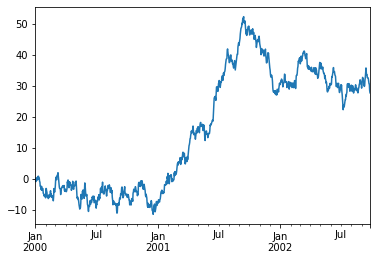

In [91]:
ts = pd.Series(np.random.randn(1000),
                index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

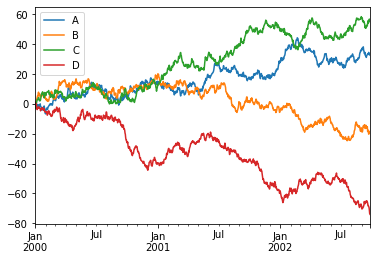

In [92]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                   columns=['A', 'B', 'C', 'D'])
df = df.cumsum()

df.plot()

## Getting data in/out

### CSV

In [93]:
df.to_csv('foo.csv')

In [94]:
pd.read_csv('foo.csv').head()

,Unnamed: 0,A,B,C,D
0,2000-01-01,-1.074036,0.049075,-3.002178,0.492040
1,2000-01-02,-1.065490,0.965369,-2.386864,-0.959705
2,2000-01-03,-1.474311,0.508647,-1.518004,-0.766845
3,2000-01-04,-1.320909,1.436745,0.462587,0.099495
4,2000-01-05,-0.707492,2.006569,0.860826,-1.202081
